In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

(train_images0, train_labels0), (test_images0, test_labels0) = mnist.load_data()

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
train_images = train_images0.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images0.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels0)
test_labels_cat = to_categorical(test_labels0)

In [12]:
model_log = model.fit(train_images, train_labels_cat, epochs=20, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0083 - acc: 0.9978
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0064 - acc: 0.9983
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0051 - acc: 0.9985
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0041 - acc: 0.9989
Epoch 5/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0035 - acc: 0.9991
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0024 - acc: 0.9994
Epoch 7/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0023 - acc: 0.9994
Epoch 8/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0017 - acc: 0.9996
Epoch 9/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0014 - acc: 0.9996
Epoch 10/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0012 - acc: 0.9998

dict_keys(['loss', 'acc'])


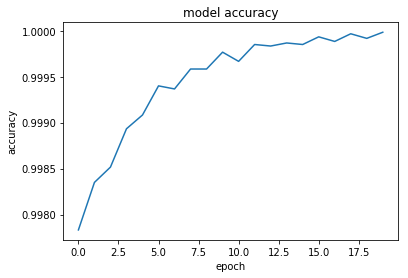

In [13]:
import matplotlib.pyplot as plt
print(model_log.history.keys())
plt.plot(model_log.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 50us/step
test_acc: 0.983
